In [ ]:
%reset -f

import numpy as np
import scipy.io as sp
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Model
from keras.layers.merge import concatenate
from tensorflow.keras import initializers, regularizers
from tensorflow.keras.layers import Dense, Input, Lambda, Dot
from tensorflow.keras.layers.experimental import preprocessing

dt = 0.01
min_t = 0
max_t = 2

t = np.arange(min_t, max_t, dt)
lt = t.shape[0]

test_n = 1000
pointspsamples_array = [1, 25, 50, 75, 100]
mean_sq_error = [0, 0, 0, 0, 0]

data = sp.loadmat('BW_data.mat')
f = data['force'][0:lt,:].T
y = data['y1'][0:lt,:].T

for num in range(0,5):    
    print('Points Per Sample: '+str(pointspsamples_array[num]))
    train_n = 150
    samples = 11000

    pointer = np.random.randint(0,lt-1,samples) 

    force = f
    time = t[pointer]
    displacement = [y[i,pointer[i]] for i in range(0,samples)]

    pointspsamples = pointspsamples_array[num]
    pointer = np.random.randint(0,lt-1,train_n*pointspsamples)
    
    UX = np.tile(f[0:train_n,0:-1:2],(pointspsamples,1))
    Y = np.zeros([train_n*pointspsamples,1])
    UXY = np.zeros([train_n*pointspsamples,1])

    for i in range(0,pointspsamples):
        for j in range(0,train_n):
            Y[int(train_n*i+j),0] = t[pointer[train_n*i+j]]
            UXY[int(train_n*i+j),0] = y[j,pointer[train_n*i+j]]
    
    ux_sensors = UX.shape[1]
    y_sensors = Y.shape[1]

    # # # # # # # # # # # # # # # # # # # #    

    with tf.device('/device:cpu:0'):
        
        def layer_dense(nodes = 1, activation_func = 'relu',
                        kernel_init = initializers.GlorotNormal(),
                        name = None):
            layer = Dense(nodes, activation = activation_func,
                         kernel_initializer = kernel_init,
                         name = name)
            return layer
            
        
        def fn(x):
            y = tf.einsum("ij,ij->i", x[0], x[1])
            y = tf.expand_dims(y, axis=1)
            return y

        hidden_layer_nodes = 40

        layer_input_a = Input(shape = (ux_sensors, ), name = "input_a")    
        normalizer_a = preprocessing.Normalization(input_shape = [ux_sensors, ], name = '15_a')
        normalizer_a.adapt(UX)
        layer_15_a = normalizer_a(layer_input_a)
        layer_20_a = layer_dense(hidden_layer_nodes, name = '20_a')(layer_15_a)
        layer_25_a = layer_dense(hidden_layer_nodes, name = '25_a')(layer_20_a)

        layer_input_b = Input(shape = (y_sensors, ), name = "input_b")
        normalizer_b = preprocessing.Normalization(input_shape = [y_sensors, ], name = '15_b')
        normalizer_b.adapt(Y)
        layer_15_b = normalizer_b(layer_input_b)    
        layer_20_b = layer_dense(hidden_layer_nodes, name = '20_b')(layer_15_b)
        layer_25_b = layer_dense(hidden_layer_nodes, name = '25_b')(layer_20_b)

        layer_35 = Lambda(fn, output_shape = [None,1], name = '35')([layer_25_a, layer_25_b])
        layer_40 = Dense(1, activation = None,
                         kernel_initializer = initializers.GlorotNormal(),
                         name = '40')(layer_35)

        model = Model(inputs = [layer_input_a, layer_input_b], outputs = layer_40)
        # model.summary()

        model.compile(loss = 'mse',
                      optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                      metrics = 'mae')

        for i in range(0,5):
            print('iteration = '+str(i))
            model.fit({"input_a":UX, "input_b":Y}, UXY,
                      epochs = 1, verbose = 1, batch_size = 128)
            for j in range(0,999):
                model.fit({"input_a":UX, "input_b":Y}, UXY,
                          epochs = 1, verbose = 0, batch_size = 128)

        string = 'model_save_BW_SDOF_TRAIN_150_TIME_STEP_SPER_SAMPLE_'+str(pointspsamples)
        model.save(string)

sample number  =  0
sample number  =  1000
sample number  =  2000
sample number  =  3000
sample number  =  4000
sample number  =  5000
sample number  =  6000
sample number  =  7000
sample number  =  8000
sample number  =  9000
sample number  =  9999

BW_SDOF_PPS1
5.476645469665527

BW_SDOF_PPS25
2.9265856742858887

BW_SDOF_PPS50
2.6975371837615967

BW_SDOF_PPS75
2.7398149967193604

BW_SDOF_PPS100
2.6379830837249756


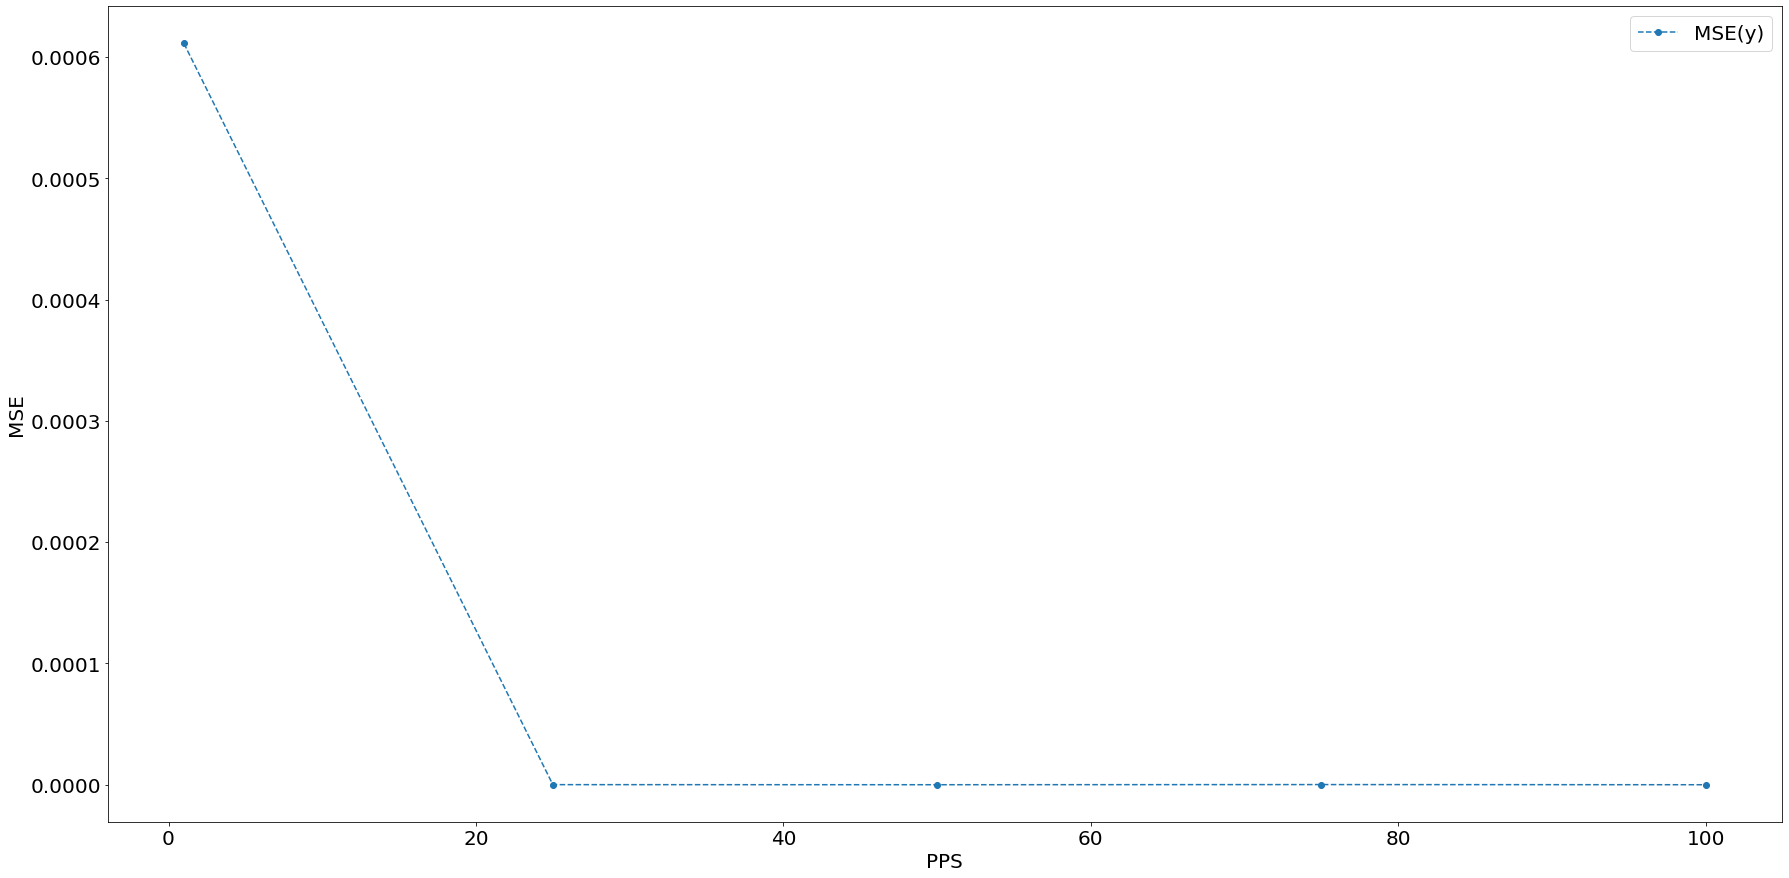

sample number  =  0
sample number  =  1000
sample number  =  2000
sample number  =  3000
sample number  =  4000
sample number  =  5000
sample number  =  6000
sample number  =  7000
sample number  =  8000
sample number  =  9000
sample number  =  9999

BW_SDOF_PPS1
3.25295352935791

BW_SDOF_PPS25
2.6339900493621826

BW_SDOF_PPS50
2.5446536540985107

BW_SDOF_PPS75
2.641369581222534

BW_SDOF_PPS100
2.499809503555298


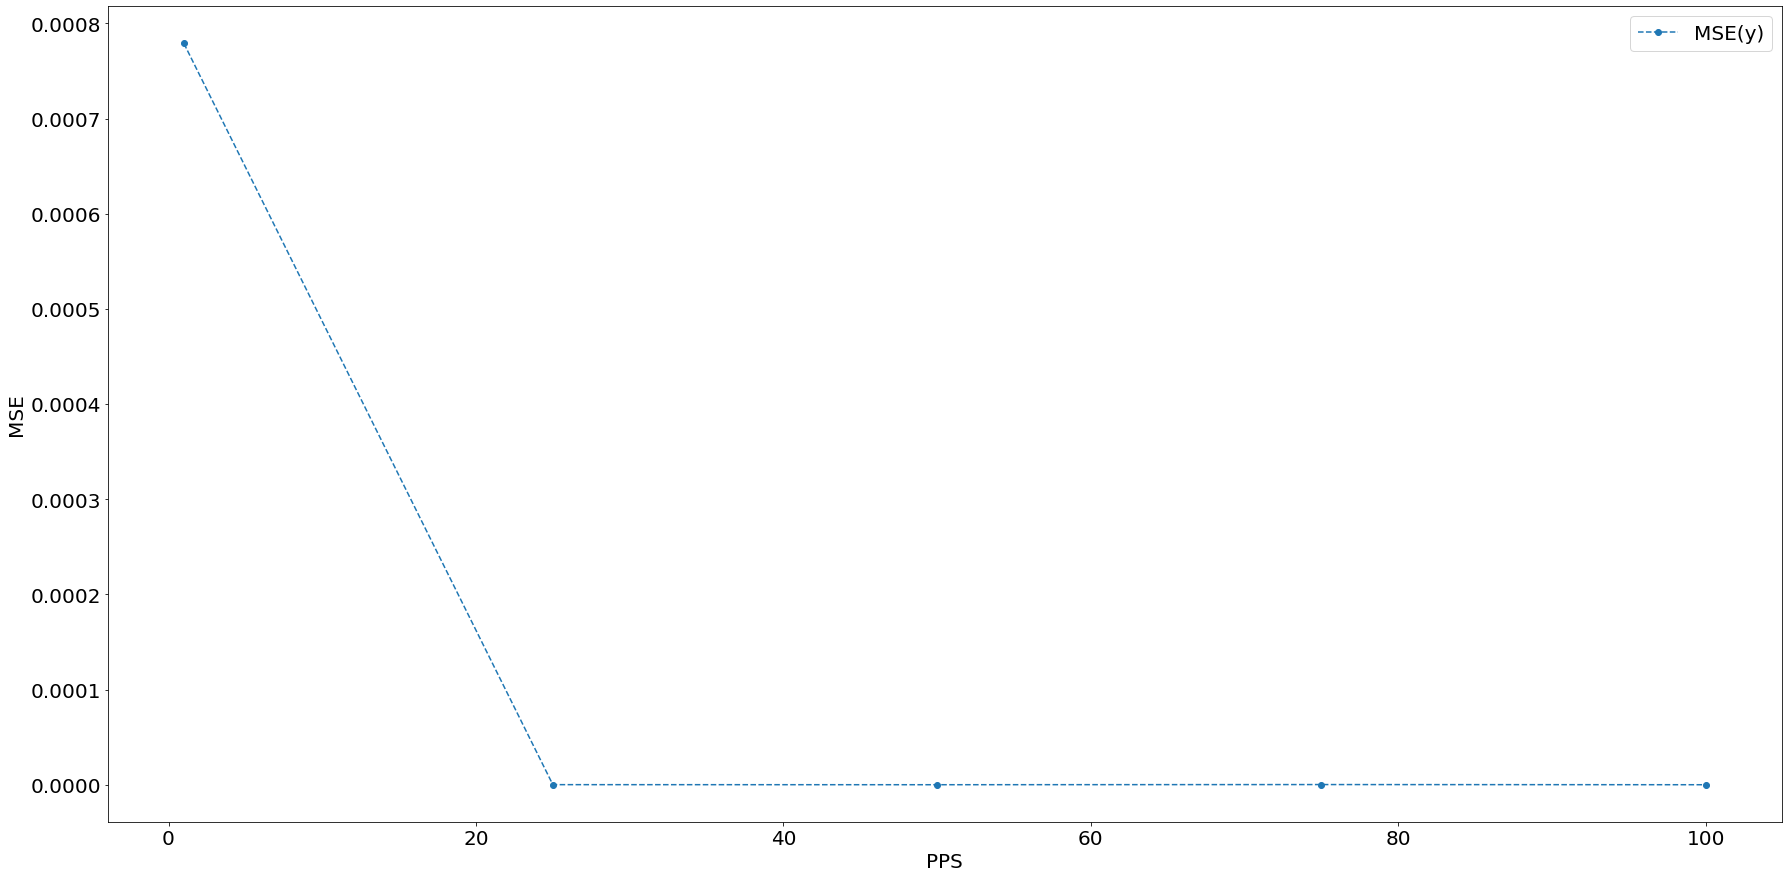

sample number  =  0
sample number  =  1000
sample number  =  2000
sample number  =  3000
sample number  =  4000
sample number  =  5000
sample number  =  6000
sample number  =  7000
sample number  =  8000
sample number  =  9000
sample number  =  9999

BW_SDOF_PPS1
2.9989631175994873

BW_SDOF_PPS25
2.5680716037750244

BW_SDOF_PPS50
2.604703903198242

BW_SDOF_PPS75
2.6022632122039795

BW_SDOF_PPS100
2.5357794761657715


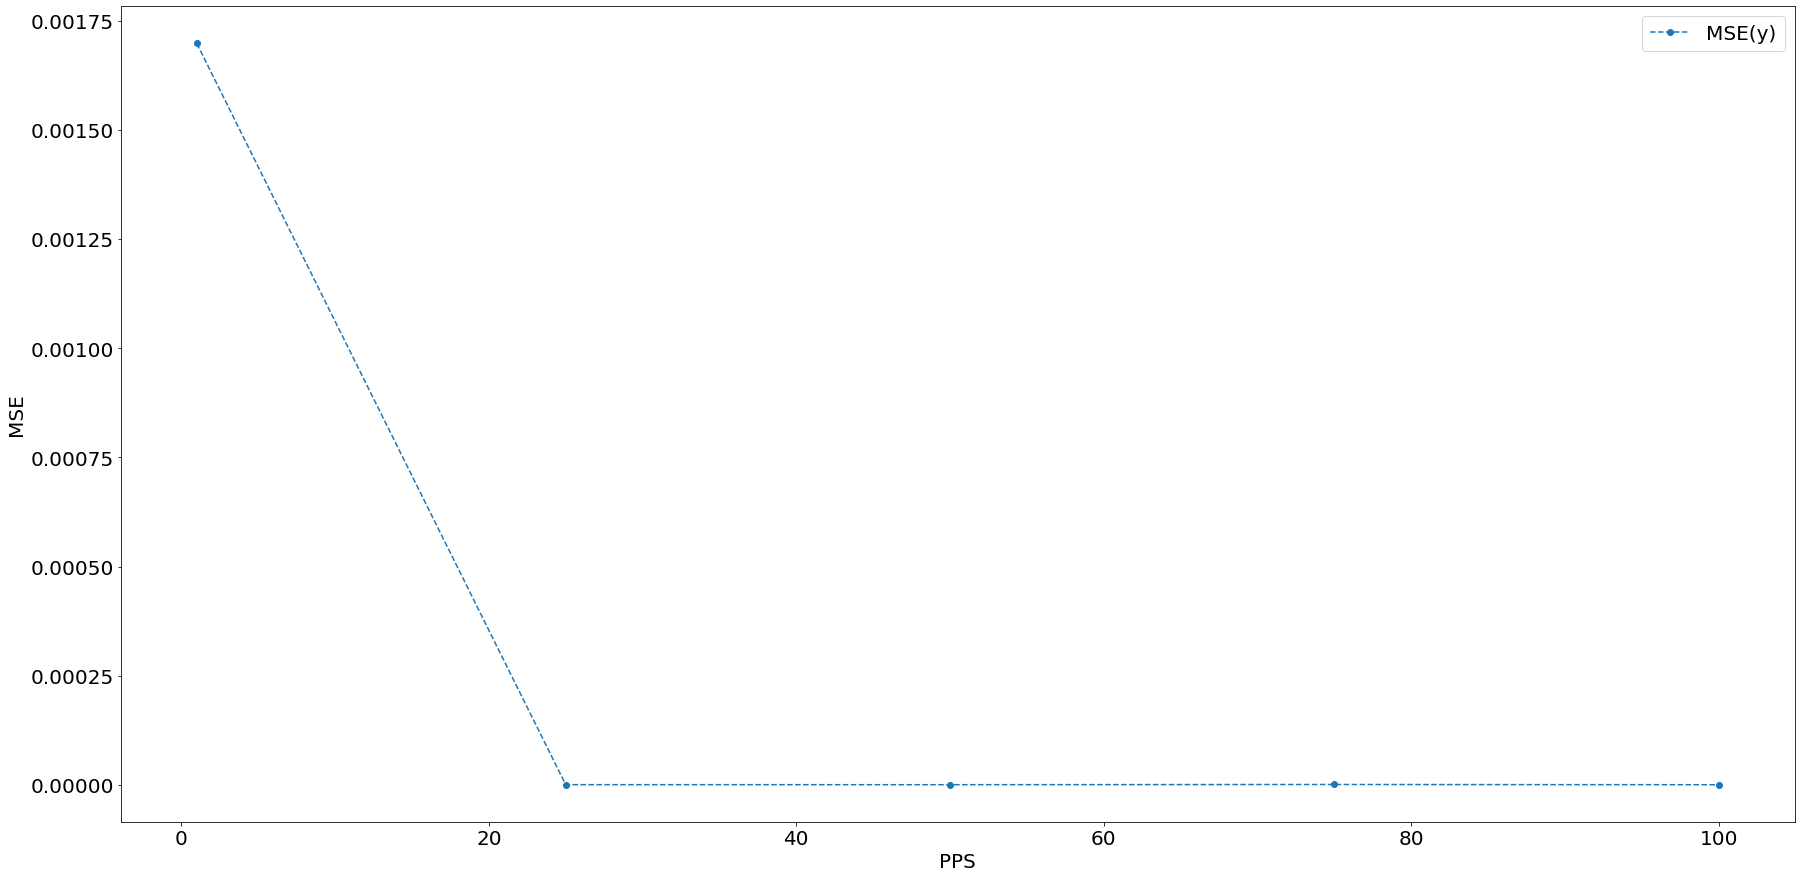

sample number  =  0
sample number  =  1000
sample number  =  2000
sample number  =  3000
sample number  =  4000
sample number  =  5000
sample number  =  6000
sample number  =  7000
sample number  =  8000
sample number  =  9000
sample number  =  9999

BW_SDOF_PPS1
2.588283061981201

BW_SDOF_PPS25
2.5977818965911865

BW_SDOF_PPS50
2.6043994426727295

BW_SDOF_PPS75
2.601039171218872

BW_SDOF_PPS100
2.556387186050415


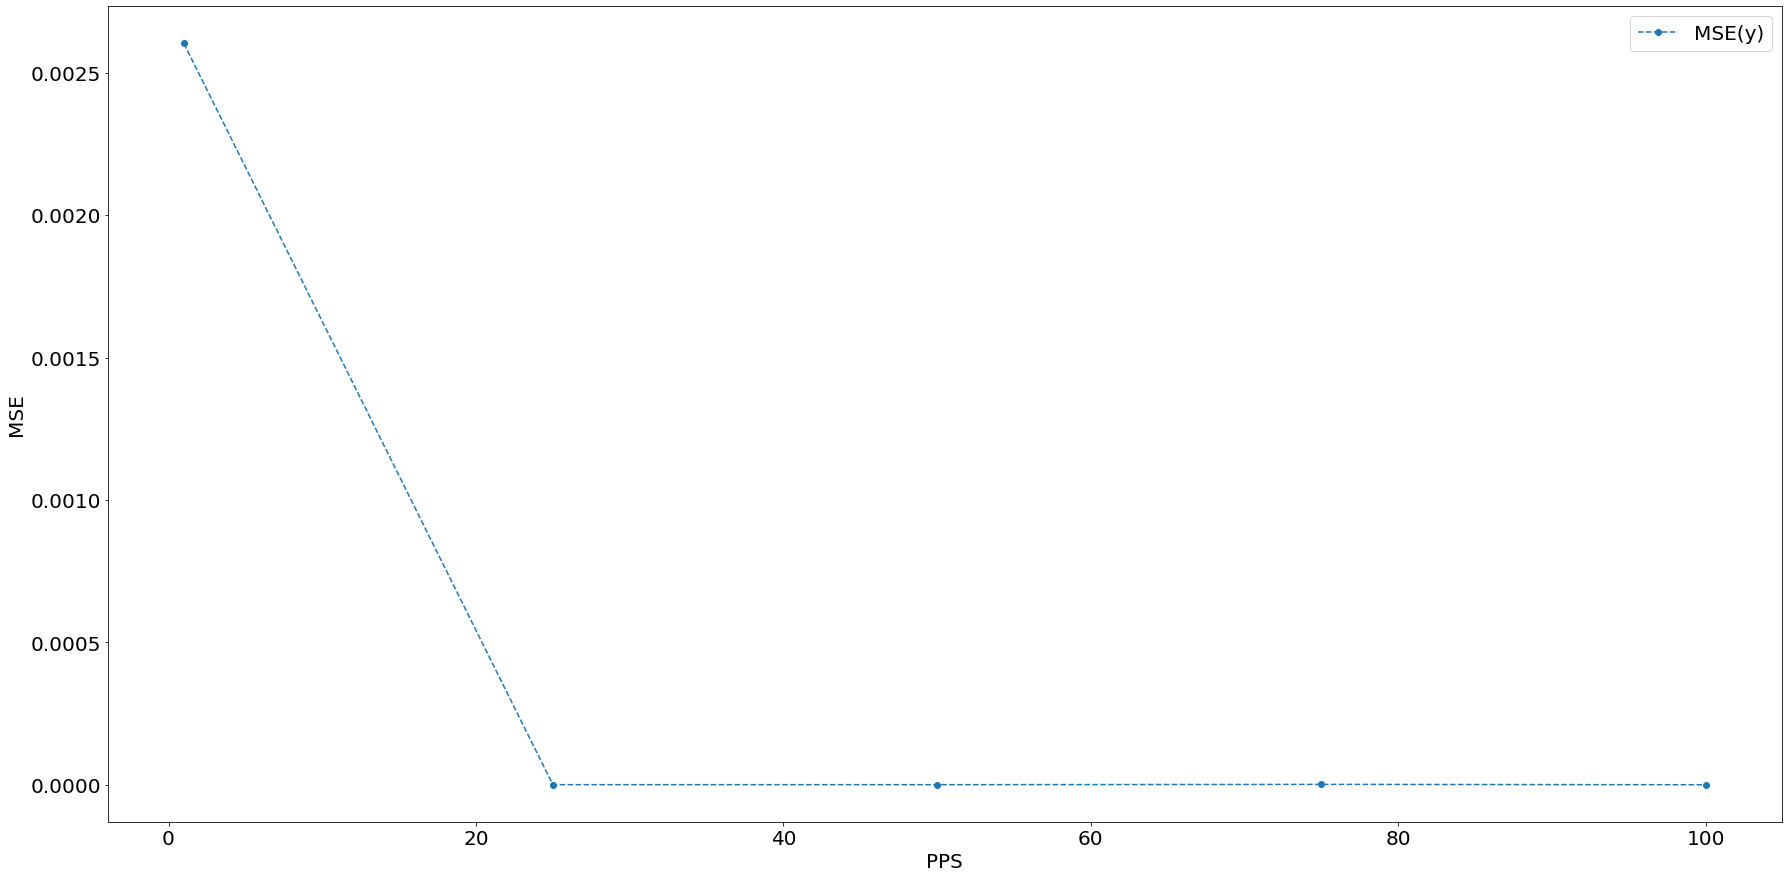

sample number  =  0
sample number  =  1000
sample number  =  2000
sample number  =  3000
sample number  =  4000
sample number  =  5000
sample number  =  6000
sample number  =  7000
sample number  =  8000
sample number  =  9000
sample number  =  9999

BW_SDOF_PPS1
4.106215238571167

BW_SDOF_PPS25
3.9531359672546387

BW_SDOF_PPS50
3.015491485595703

BW_SDOF_PPS75
2.7286508083343506

BW_SDOF_PPS100
2.511012315750122


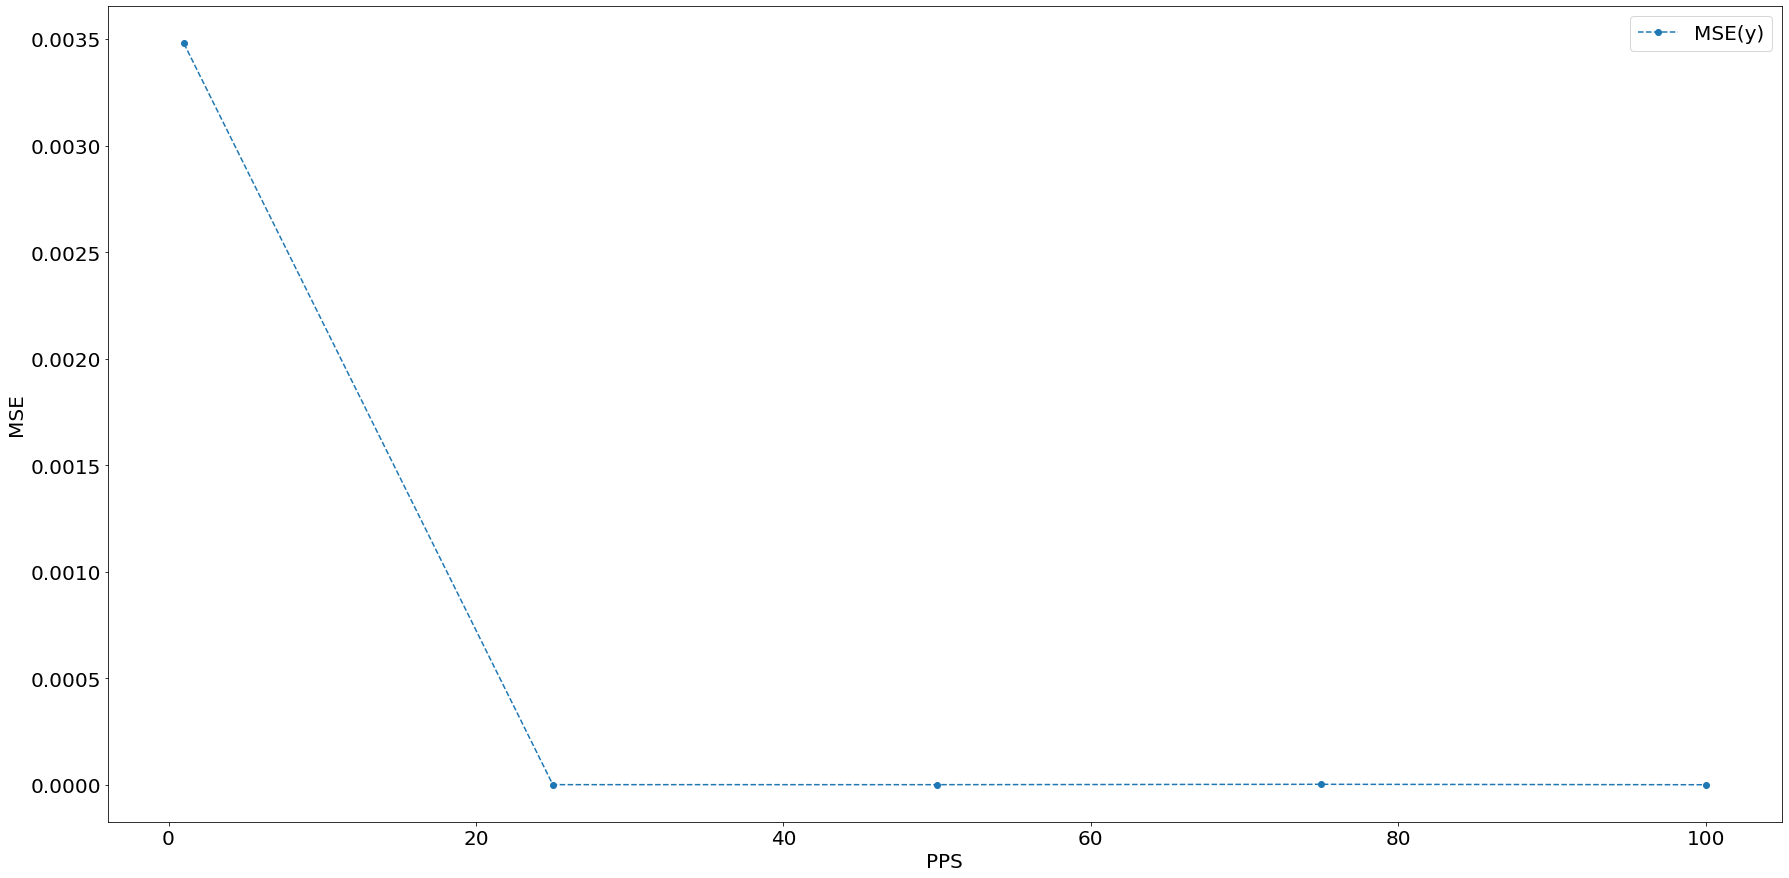

In [1]:
%reset -f

import time
import numpy as np
import scipy.io as sp
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Model
from keras.layers.merge import concatenate
from tensorflow.keras import initializers, regularizers
from tensorflow.keras.layers import Dense, Input, Lambda, Dot
from tensorflow.keras.layers.experimental import preprocessing

with tf.device('/device:cpu:0'):
    
    predicted = np.zeros([10000,200])
    x_test_0_new = np.zeros([2000000, 100])
    x_test_1_new = np.zeros([2000000, 1])

    def rkm(y1, y2, z, f, t):
        h = dt

        F1 = lambda Y: Y[2]
        F2 = lambda Y: (1/m)*(f-(c*Y[2]+k*Y[1]+(1-kr)*Qy*Y[3]))
        F3 = lambda Y: (1/Dy)*(alpha*Y[2]-gamma*Y[3]*np.abs(Y[2])*np.abs(Y[3])**(eta-1)-beta*Y[2]*(np.abs(Y[3]))**eta)    

        k0 = h*F1([t, y1, y2, z]);
        l0 = h*F2([t, y1, y2, z]);
        m0 = h*F3([t, y1, y2, z]);

        k1 = h*F1([t+0.5*h, y1+0.5*k0, y2+0.5*l0, z+0.5*m0]);
        l1 = h*F2([t+0.5*h, y1+0.5*k0, y2+0.5*l0, z+0.5*m0]);
        m1 = h*F3([t+0.5*h, y1+0.5*k0, y2+0.5*l0, z+0.5*m0]);

        k2 = h*F1([t+0.5*h, y1+0.5*k1, y2+0.5*l1, z+0.5*m1]);
        l2 = h*F2([t+0.5*h, y1+0.5*k1, y2+0.5*l1, z+0.5*m1]);
        m2 = h*F3([t+0.5*h, y1+0.5*k1, y2+0.5*l1, z+0.5*m1]);

        k3 = h*F1([t, y1+k2, y2+l2, z+m2]);
        l3 = h*F2([t, y1+k2, y2+l2, z+m2]);
        m3 = h*F3([t, y1+k2, y2+l2, z+m2]);

        y1 = y1+(1/6)*(k0+2*k1+2*k2+k3);
        y2 = y2+(1/6)*(l0+2*l1+2*l2+l3);
        z = z+(1/6)*(m0+2*m1+2*m2+m3);

        return y1, y2, z

    for ft_num in range(0,5):

        ft_terms = [20, 25, 50, 75, 100]

        dt = 0.01
        min_t = 0
        max_t = 2

        t = np.arange(min_t, max_t, dt)
        lt = t.shape[0]

        test_samples = 10000

        y1 = np.zeros([lt, test_samples])+0.01
        y2 = np.zeros([lt, test_samples])+0.05
        z = np.zeros([lt, test_samples])+0.001

        ft = ft_terms[ft_num]
        am = np.random.uniform(-50, 50, [test_samples,ft])
        fr = np.random.uniform(0, 10, [test_samples,ft])
        s1 = np.arange(0,ft,2)
        s2 = np.arange(1,ft,2)
        f = np.zeros([lt, test_samples])
        for i in range(0, test_samples):
            f[:, i] = (np.sum([am[i,j]*np.sin(fr[i,j]*t) for j in s1],0,keepdims=True) +
                       np.sum([am[i,j]*np.cos(fr[i,j]*t) for j in s2],0,keepdims=True))

        m = 6800; c = 3740; k = 232000
        Qy = 0.05*m*9.81; kr = (1/6); alpha = 1
        beta = 0.5; gamma = 0.5; Dy = 0.013; eta = 2 

        for i in range(0, test_samples):
            if i%1000 ==  0 or i == test_samples-1: print('sample number  = ', i) 
            for j in range(1, lt):
                y1[j, i], y2[j, i], z[j, i] = rkm(y1[j-1, i], y2[j-1, i], z[j-1, i], f[j-1, i], t[j-1])

        string = 'BW_SDOF_testing_data_varying_PPS_FT_'+str(ft)+'.mat'
        sp.savemat(string,{'force': f, 'y1': y1, 'y2': y2, 'z': z, 'fourier_terms': ft})

        x_test = f[0:-1:2,:].T

        pointspsamples_array = [1, 25, 50, 75, 100]
        mean_sq_error = np.zeros([1,5])

        y = y1.T

        for model_num in range(0,5):
            
            string = 'model_save_BW_SDOF_TRAIN_150_TIME_STEP_SPER_SAMPLE_'+str(pointspsamples_array[model_num])
            model = tf.keras.models.load_model(string)
            print('\nBW_SDOF_PPS'+str(pointspsamples_array[model_num]))

            start_time = time.time()
            for i in range(0,test_samples):
                x_test_0_new[lt*i:lt+lt*i,:] = np.tile(x_test[i,:],[200,1])
                x_test_1_new[lt*i:lt+lt*i,:] = t.reshape([lt,1])

            predictions_new = model({"input_a":x_test_0_new,
                                     "input_b":x_test_1_new})

            predictions_new = np.array(predictions_new)
            for i in range(0,test_samples):
                predicted[i,:] = predictions_new[lt*i:lt+lt*i].reshape(1,-1)
            print(time.time()-start_time)

            string = 'BW_SDOF_training_samples_150_PPS'+str(pointspsamples_array[model_num])+'_FT_'+str(ft)+'.mat' 
            sp.savemat(string,{'actual_y': y, 'predicted_y': predicted, 'PPS': pointspsamples_array[model_num], 'fourier_terms': ft})


            error = (y-predicted)
            mean_sq_error[0, model_num] = np.mean(error**2)

        plt.figure(figsize = [30,15])

        string = 'MSE(y)'
        plt.plot(pointspsamples_array,mean_sq_error[0,:], 'o--', label = string)

        plt.xlabel('PPS',fontsize = 20)
        plt.ylabel('MSE',fontsize = 20)
        plt.tick_params(axis = 'x', labelsize = 20)
        plt.tick_params(axis = 'y', labelsize = 20)
        plt.legend(fontsize = 20)
        plt.show()